In [44]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

snps=pd.read_csv("/mnt/lab_data/kundaje/users/anusri/QTLs/bQTLs/src/pu1.txt",header=0,sep='\t')
dnase_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/DNASE/summary.mean.variant_scores_new.tsv"
atac_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ATAC/summary.mean.variant_scores_new.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/bqtls_pu1_preds/snp_scores.tsv"


In [45]:
snps.head()
snps['rsid'] = snps["Chr"].astype(str) + "_" + snps["position"].astype(str) + "_" + snps["POSTallele"].astype(str) + "_" + snps["ALTallele"].astype(str)

In [46]:
snps.shape

(999799, 11)

# Load predictions and merge with original ground truth

In [47]:
bqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
bqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)


In [48]:
bqtls_dnase = bqtls_dnase.merge(snps, on=["rsid"])
bqtls_dnase['logratio']=np.log2((bqtls_dnase['prechipfreq'].astype(float)+.01)/(bqtls_dnase['POSTfreq'].astype(float)+0.01))
bqtls_dnase.shape

(999799, 34)

In [49]:
bqtls_dnase

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,logratio
0,chr17,18967176,A,G,chr17_18967176_A_G,0.360720,0.360720,0.004843,0.052333,0.012956,...,18967176,538,418,120,G,A,0.223048,0.866699,2.331853e-251,1.911452
1,chr4,176935913,C,A,chr4_176935913_C_A,0.868729,0.868729,0.000114,0.130124,0.000546,...,176935913,626,597,29,A,C,0.046326,0.543949,4.449643e-162,3.297883
2,chr1,144534083,C,T,chr1_144534083_C_T,-0.126218,0.126218,0.056961,0.026379,0.082289,...,144534083,618,368,250,T,C,0.404531,0.057295,5.863065e-141,-2.622909
3,chr17,19015381,T,A,chr17_19015381_T_A,-0.024811,0.024811,0.398536,0.013973,0.313280,...,19015381,144,143,1,A,T,0.006944,0.872850,1.040250e-126,5.703284
4,chr1,17231724,A,G,chr1_17231724_A_G,0.010826,0.020502,0.476720,0.014068,0.302950,...,17231724,2477,1321,1156,G,A,0.466694,0.255195,9.915948e-114,-0.846009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999794,chr7,72298789,C,T,chr7_72298789_C_T,0.050982,0.050982,0.239786,0.021805,0.116567,...,72298789,214,4,210,T,C,0.981308,0.979512,1.000000e+00,-0.002617
999795,chr18,46347288,A,G,chr18_46347288_A_G,-0.012851,0.012851,0.585024,0.008375,0.732454,...,46347288,109,3,106,G,A,0.972477,0.972421,1.000000e+00,-0.000083
999796,chr18,55508743,A,G,chr18_55508743_A_G,0.046383,0.046383,0.198783,0.013923,0.342888,...,55508743,65,2,63,G,A,0.969231,0.975832,1.000000e+00,0.009693
999797,chr19,16245697,A,G,chr19_16245697_A_G,0.078009,0.078009,0.118484,0.028060,0.063330,...,16245697,109,3,106,G,A,0.972477,0.976196,1.000000e+00,0.005451


In [50]:
bqtls_atac = bqtls_atac.merge(snps, on=["rsid"])
bqtls_atac['logratio']=np.log2((bqtls_atac['prechipfreq'].astype(float)+.01)/(bqtls_atac['POSTfreq'].astype(float)+0.01))
bqtls_atac.shape

(999799, 34)

In [51]:
bqtls_atac

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,logratio
0,chr17,18967176,A,G,chr17_18967176_A_G,0.311478,0.311478,0.017033,0.052623,0.011653,...,18967176,538,418,120,G,A,0.223048,0.866699,2.331853e-251,1.911452
1,chr4,176935913,C,A,chr4_176935913_C_A,1.523892,1.523892,0.000073,0.181628,0.000215,...,176935913,626,597,29,A,C,0.046326,0.543949,4.449643e-162,3.297883
2,chr1,144534083,C,T,chr1_144534083_C_T,-0.233717,0.233717,0.035638,0.025101,0.064513,...,144534083,618,368,250,T,C,0.404531,0.057295,5.863065e-141,-2.622909
3,chr17,19015381,T,A,chr17_19015381_T_A,-0.045305,0.045305,0.378414,0.011349,0.319737,...,19015381,144,143,1,A,T,0.006944,0.872850,1.040250e-126,5.703284
4,chr1,17231724,A,G,chr1_17231724_A_G,0.008116,0.046234,0.346740,0.008417,0.447890,...,17231724,2477,1321,1156,G,A,0.466694,0.255195,9.915948e-114,-0.846009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999794,chr7,72298789,C,T,chr7_72298789_C_T,-0.059978,0.059978,0.272276,0.016797,0.138439,...,72298789,214,4,210,T,C,0.981308,0.979512,1.000000e+00,-0.002617
999795,chr18,46347288,A,G,chr18_46347288_A_G,0.004268,0.011992,0.747759,0.005380,0.763681,...,46347288,109,3,106,G,A,0.972477,0.972421,1.000000e+00,-0.000083
999796,chr18,55508743,A,G,chr18_55508743_A_G,0.028695,0.028695,0.497768,0.010453,0.318724,...,55508743,65,2,63,G,A,0.969231,0.975832,1.000000e+00,0.009693
999797,chr19,16245697,A,G,chr19_16245697_A_G,0.020137,0.070350,0.244012,0.013821,0.197371,...,16245697,109,3,106,G,A,0.972477,0.976196,1.000000e+00,0.005451


# Get 100 based on p-value and bottom 100 samples randomly from 10000

In [52]:
bqtls_dnase['pvalue'] = bqtls_dnase['pvalue'].astype(float)

high_sig_index=bqtls_dnase.nsmallest(100,'pvalue').index
non_sig=bqtls_dnase.nlargest(10000,'pvalue')
non_sig_index = non_sig.sample(10000).index


snps_dnase=pd.concat((bqtls_dnase.loc[high_sig_index,:],bqtls_dnase.loc[non_sig_index,:]),axis=0)
snps_dnase["sig"] = [True]*100+[False]*10000
snps_dnase['color']='r'
snps_dnase['color'][snps_dnase['sig']==True]='b'



#snps_dnase['logratio']=np.log2((snps_dnase['prechipfreq'].astype(float)+.01)/(snps_dnase['POSTfreq'].astype(float)+0.01))


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
snps_atac=pd.concat((bqtls_atac.loc[high_sig_index,:],bqtls_atac.loc[non_sig_index,:]),axis=0)
snps_atac["sig"] = [True]*100+[False]*10000
snps_atac['color']='r'
snps_atac['color'][snps_atac['sig']==True]='b'


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
from plotnine import * 


In [55]:
snps_atac.head()


,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,logratio,sig,color
8,chr15,70174409,C,T,chr15_70174409_C_T,1.898931,1.898931,0.000016,0.158762,0.000335,...,226,38,T,C,0.143939,0.775476,0.0,2.351205,True,b
9,chr12,8608502,T,A,chr12_8608502_T_A,-0.016398,0.079417,0.225645,0.011803,0.259056,...,16,427,A,T,0.963883,0.502999,0.0,-0.924791,True,b
10,chr5,124341259,T,A,chr5_124341259_T_A,0.763557,0.763557,0.001556,0.120696,0.000875,...,406,27,A,T,0.062356,0.536452,0.0,2.916916,True,b
11,chr7,31728180,T,C,chr7_31728180_T_C,-1.392425,1.392425,0.000115,0.091528,0.002221,...,6,527,C,T,0.988743,0.552468,0.0,-0.828343,True,b
12,chr4,116877281,G,C,chr4_116877281_G_C,-0.827331,0.827331,0.001106,0.111758,0.001150,...,18,500,C,G,0.965251,0.543736,0.0,-0.816574,True,b


In [56]:
#snps_atac["output_sign_result"] = np.sign(snps_atac["logfc.mean"])*snps_atac["abs_logfc_x_jsd_x_max_percentile.mean"]
snps_atac["output_sign_result_1"] = np.sign(snps_atac["logfc.mean"])*snps_atac["jsd.mean"]

#snps_dnase["output_sign_result"] = np.sign(snps_dnase["logfc.mean"])*snps_dnase["abs_logfc_x_jsd_x_max_percentile.mean"]
snps_dnase["output_sign_result_1"] = np.sign(snps_dnase["logfc.mean"])*snps_dnase["jsd.mean"]

In [57]:
snps_atac.shape

(10100, 37)

In [58]:
snps_atac.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chr', 'position', 'Depth',
       'ALTdepth', 'REFDepth', 'ALTallele', 'POSTallele', 'POSTfreq',
       'prechipfreq', 'pvalue', 'logratio', 'sig', 'color',
       'output_sign_result_1'],
      dtype='object')

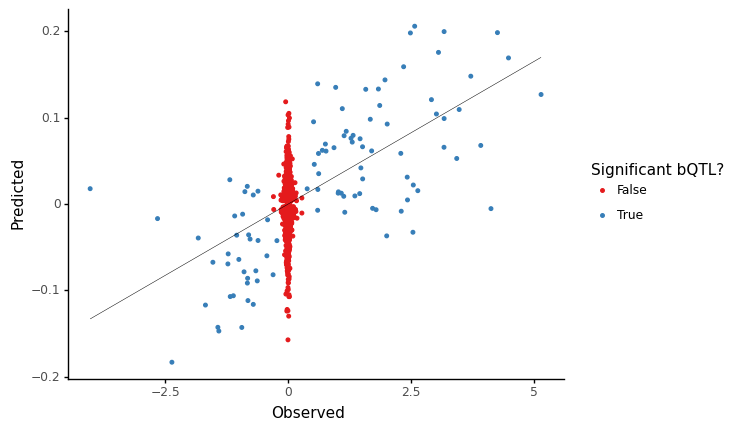

<ggplot: (8753641729101)>

In [59]:
p = (ggplot(snps_atac, aes('logratio', 'output_sign_result_1', color='factor(sig)'))
 + geom_point(alpha=1,size=1)
 + geom_smooth(method = "lm", se = False, color="black", size=0.2)
 + xlab("Observed")
 + ylab("Predicted")
 + scale_color_manual(values=['#e41a1c','#377eb8'],name="Significant bQTL?")
 + theme_classic() 
)
p
#p.save("subfigs_new/bqtls_atac_significant_hits.pdf",dpi="300")
#p.save("subfigs/bqtls_atac_significant_hits.pdf",dpi="300")

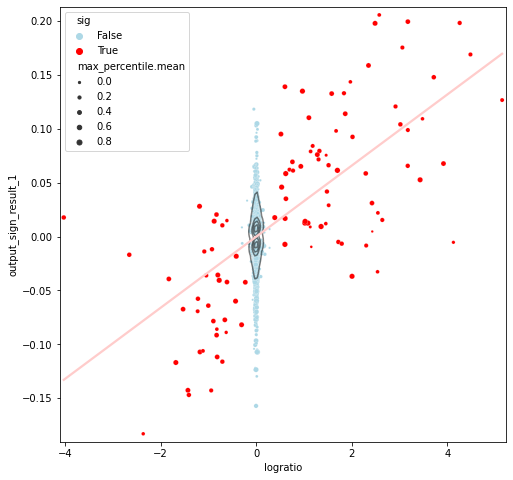

In [75]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))

sns.kdeplot(
    data=snps_atac,
    x="logratio",
    y="output_sign_result_1",
    levels=5,
    fill=False,
    alpha=0.5,
    color="black",
    cut=2,

)
ax = sns.scatterplot(x="logratio", y="output_sign_result_1", hue="sig", palette=['#ADD8E6', 'red'], data=snps_atac, size="max_percentile.mean", sizes=(5, 30))

sns.regplot(x="logratio", y="output_sign_result_1", data=snps_atac, scatter=False, ci=None, color="#ffcccb")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("subfigs_new/bqtls_atac_significant_hits.pdf", transparent=True, dpi=300 )
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

# norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
# sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
# sm.set_array([])

# # Remove the legend and add a colorbar
# ax.get_legend().remove()
# ax.figure.colorbar(sm)


In [76]:
snps_atac.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chr', 'position', 'Depth',
       'ALTdepth', 'REFDepth', 'ALTallele', 'POSTallele', 'POSTfreq',
       'prechipfreq', 'pvalue', 'logratio', 'sig', 'color',
       'output_sign_result_1'],
      dtype='object')

In [77]:
import scipy


In [18]:
#scipy.stats.pearsonr(snps_atac['logratio'],snps_atac['logfc_x_jsd.mean'])

In [78]:
scipy.stats.pearsonr(snps_atac['logratio'],snps_atac['output_sign_result_1'])

(0.37397070729978615, 0.0)

In [79]:
scipy.stats.pearsonr(snps_atac[snps_atac["sig"]]['logratio'],snps_atac[snps_atac["sig"]]['output_sign_result_1'])

(0.7139808102249252, 7.535380879388476e-17)

In [20]:
#scipy.stats.spearmanr(snps_atac['logratio'],snps_atac['abs_logfc_x_jsd_x_max_percentile.mean'])

In [21]:
#scipy.stats.pearsonr(snps_dnase['logratio'],snps_dnase['logfc_x_jsd.mean'])

In [84]:
scipy.stats.pearsonr(snps_dnase['logratio'],snps_dnase['output_sign_result_1'])

(0.3227575907707159, 1.4845829969820472e-243)

In [85]:
scipy.stats.pearsonr(snps_dnase[snps_dnase["sig"]]['logratio'],snps_dnase[snps_dnase["sig"]]['output_sign_result_1'])

(0.7330068912168695, 4.3267665652712204e-18)

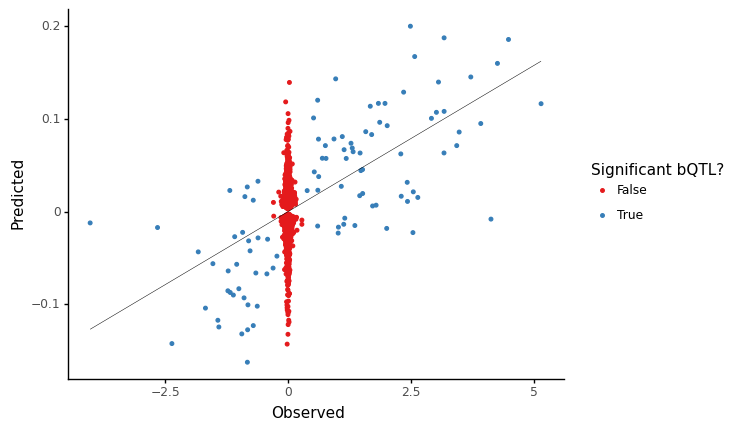

<ggplot: (8753891039221)>

In [81]:
p = (ggplot(snps_dnase, aes('logratio', 'output_sign_result_1', color='factor(sig)'))
 + geom_point(alpha=1,size=1)
 + geom_smooth(method = "lm", se = False, color="black", size=0.2)
 + xlab("Observed")
 + ylab("Predicted")
 + scale_color_manual(values=['#e41a1c','#377eb8'],name="Significant bQTL?")
 + theme_classic() 
)
p
#p.save("subfigs_new/bqtls_dnase_significant_hits.pdf",dpi="300")

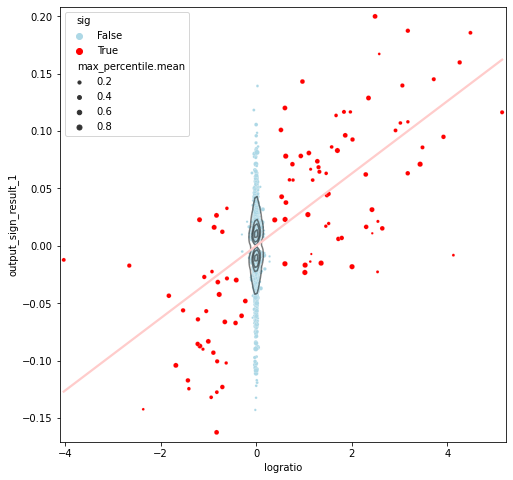

In [82]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))

sns.kdeplot(
    data=snps_dnase,
    x="logratio",
    y="output_sign_result_1",
    levels=5,
    fill=False,
    alpha=0.5,
    color="black",
    cut=2,

)
ax = sns.scatterplot(x="logratio", y="output_sign_result_1", hue="sig", palette=['#ADD8E6', 'red'], data=snps_dnase, size="max_percentile.mean", sizes=(5, 30))

sns.regplot(x="logratio", y="output_sign_result_1", data=snps_dnase, scatter=False, ci=None, color="#ffcccb")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("subfigs_new/bqtls_dnase_significant_hits.pdf", transparent=True, dpi=300 )
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

# norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
# sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
# sm.set_array([])

# # Remove the legend and add a colorbar
# ax.get_legend().remove()
# ax.figure.colorbar(sm)


In [92]:
import matplotlib

import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 10]

def plot_enrichment_curves(df, compare_score, model_score, output_file, compare_score_ascending=False, model_score_ascending=True,
                           thresh_list=[0.5, 0.1, 0.05, 0.01, 0.005, 0.001], subsample=False, ymax='auto', debug=False):
    by_thresh_dict = {'score':[], 'ratio':[], 'thresh':[]}
    
    #df[model_score+"_abs"] = np.abs(df[model_score])
    #model_score = model_score+"_abs"
    print(model_score)
    #thresh_list = [df[model_score].quantile(1-0.5), df[model_score].quantile(1-0.1), df[model_score].quantile(1-0.05), df[model_score].quantile(1-0.01),
    #              df[model_score].quantile(1-0.005), df[model_score].quantile(1-0.001), df[model_score].quantile(1-0.0005), df[model_score].quantile(1-0.0001)]
    print(thresh_list)
    for thresh in thresh_list:
        df[compare_score].fillna(0, inplace=True)
        sample_df = df.sort_values(by=[compare_score, model_score], ascending=[False, True])
        #print(sample_df.head())
        #print(sample_df.tail())
        print(thresh)
        print(sum(sample_df[model_score] < thresh))
        ratio = len(sample_df.loc[sample_df[model_score] < thresh]) / len(sample_df)
        sample_df['sig'] = sample_df[model_score].apply(lambda x: x < thresh)
        sample_df['expected'] = [ratio] * len(sample_df)
        expected = sample_df['expected'].cumsum().tolist()
        observed = sample_df['sig'].cumsum().tolist()
        
        enrich_ratio = np.array(observed) / np.array(expected)
        compare_vals = sample_df[compare_score].tolist()
        enrich_ratio = enrich_ratio.tolist()
        assert len(compare_vals) == len(enrich_ratio)
        by_thresh_dict['ratio'].extend(enrich_ratio)
        by_thresh_dict['score'].extend(compare_vals)
        by_thresh_dict['thresh'].extend([thresh] * len(sample_df))
        
        if debug:
            print(thresh)
            print('Expected:', expected[:10])
            print('Observed:', observed[:10])
            print('Ratio:', enrich_ratio[:10])
            print('Compare Scores:', compare_vals[:10])
            print()
        
    by_thresh_df = pd.DataFrame(by_thresh_dict)
    by_thresh_df.sort_values(by=['score'], ascending=False, inplace=True)
    if subsample:
        by_thresh_df = pd.concat([by_thresh_df.iloc[:20000,].copy(), by_thresh_df.iloc[20000:,].copy().sample(30000)])
    return by_thresh_df
    #plt.show()

In [93]:
bqtls_atac["pvalue_sign"] = np.log10(bqtls_atac["pvalue"].astype(float))*-1
bqtls_atac["abs_logfc_x_jsd_x_max_percentile.mean.pval"] = bqtls_atac["abs_logfc_x_jsd_x_max_percentile.mean.pval"].astype(float)
by_thresh_df = plot_enrichment_curves(bqtls_atac, debug=False,
                       compare_score='pvalue_sign', model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="bqtls.pdf")

/users/anusri/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


abs_logfc_x_jsd_x_max_percentile.mean.pval
[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
0.5
573477
0.1
125867
0.05
62696
0.01
13770
0.005
7363
0.001
1756


[None]

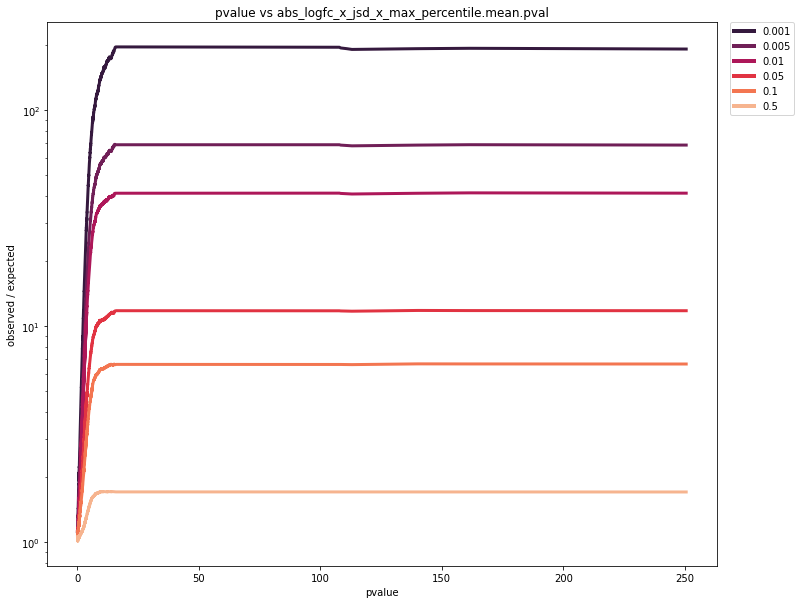

In [101]:
compare_score='pvalue'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 6))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')

#plt.xlim((0,50))
#plt.savefig("subfigs/"+output_file, transparent=True, dpi=300)

In [102]:
# compare_score='pvalue'
# model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
# ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
#                   hue='thresh', palette=sns.color_palette('rocket', 8))
# leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# for line in leg.get_lines():
#     line.set_linewidth(4)
# xmax="auto"
# ymax="auto"
# ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
# ax.set(yscale='log')
# #ax.set(xscale='log')

# #plt.xlim((-0.00001,0.5))
# #plt.savefig("subfigs/"+output_file, transparent=True, dpi=300)

In [103]:
bqtls_atac["pvalue"] 

0         2.331853e-251
1         4.449643e-162
2         5.863065e-141
3         1.040250e-126
4         9.915948e-114
              ...      
999794     1.000000e+00
999795     1.000000e+00
999796     1.000000e+00
999797     1.000000e+00
999798     1.000000e+00
Name: pvalue, Length: 999799, dtype: float64

In [104]:
#bqtls_atac["output_sign_result"] = np.sign(bqtls_atac["logfc.mean"])*bqtls_atac["abs_logfc_x_jsd_x_max_percentile.mean"]
#bqtls_dnase["output_sign_result"] = bqtls_dnase["logfc.mean"]*bqtls_dnase["abs_logfc_x_jsd_x_max_percentile.mean"]
bqtls_atac["output_sign_result_1"] = np.sign(bqtls_atac["logfc.mean"])*bqtls_atac["jsd.mean"]
bqtls_dnase["output_sign_result_1"] = np.sign(bqtls_dnase["logfc.mean"])*bqtls_dnase["jsd.mean"]

In [105]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 


['n: 191', 'n: 196', 'n: 408', 'n: 1374', 'n: 9765', 'n: 139245', 'n: 200408', 'n: 319347', 'n: 328619']


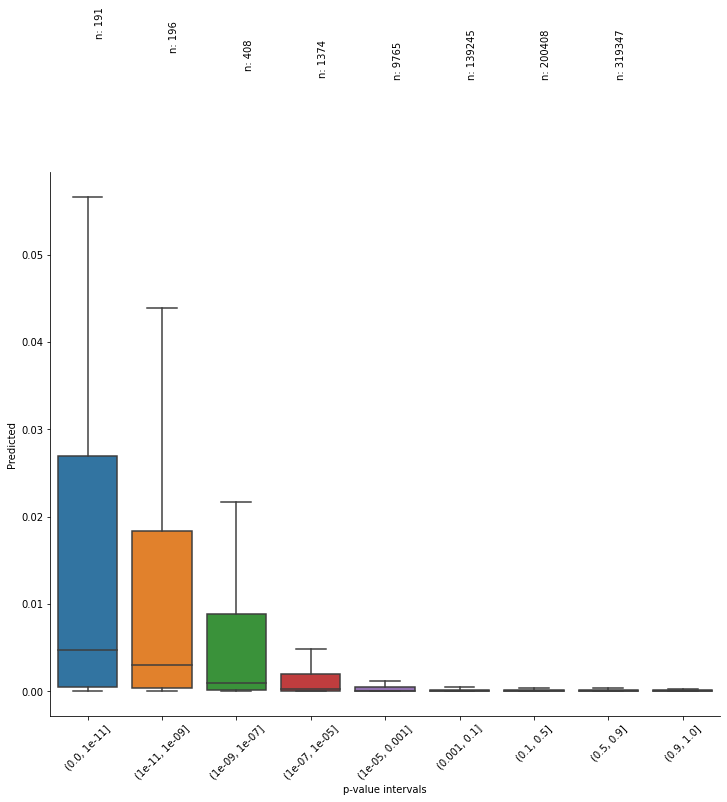

In [106]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls_atac['value_group'] = pd.cut(bqtls_atac["pvalue"].astype(np.float64), bins=bins)
ax = sns.boxplot(x="value_group", y="abs_logfc_x_jsd_x_max_percentile.mean", data=bqtls_atac, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls_atac.groupby(['value_group'])['abs_logfc_x_jsd_x_max_percentile.mean'].median().values
nobs= bqtls_atac['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs_new/atac_bqtls_with_enrichment.pdf", transparent=True, dpi=300)


['n: 191', 'n: 196', 'n: 408', 'n: 1374', 'n: 9765', 'n: 139245', 'n: 200408', 'n: 319347', 'n: 328619']


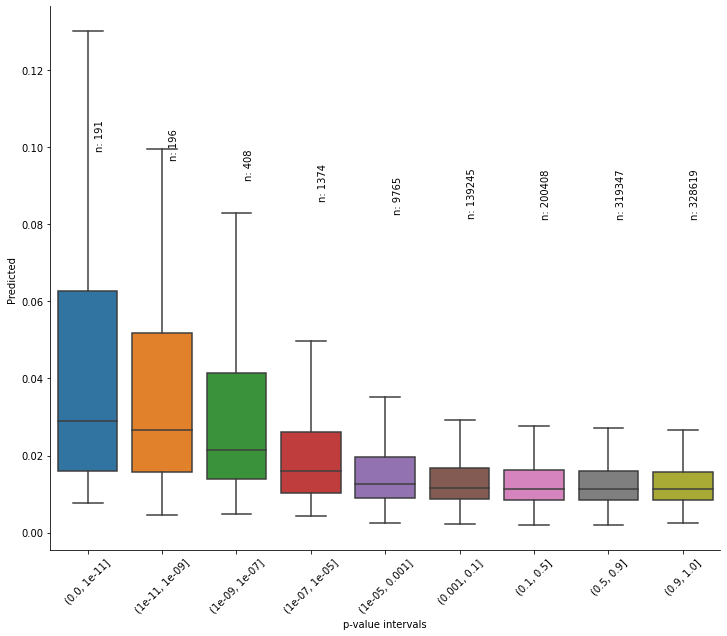

In [112]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls_dnase['value_group'] = pd.cut(bqtls_dnase["pvalue"].astype(np.float64), bins=bins)
ax = sns.boxplot(x="value_group", y="jsd.mean", data=bqtls_dnase, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls_dnase.groupby(['value_group'])['jsd.mean'].median().values
nobs= bqtls_dnase['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs_new/dnase_bqtls_with_pval_predicted.pdf", transparent=True, dpi=300)


In [113]:
from sklearn.decomposition import PCA
import scipy.stats
def get_pc_component(df1):
    val1 = df1["jsd.mean"].astype(float)*np.sign(df1['logfc.mean'].astype(float))
    val2 = df1["logfc.mean"].astype(float)
    val3 = df1["jsd.mean"].astype(float)*df1['logfc.mean'].astype(float)
    #val4 = df1["log_prob_log2s.mean"].astype(float)*df1['logfc.mean'].astype(float)

    #print(df1.shape)
    values = [val2, val3]
    values = np.array(values)
    #print(values.shape)
    values = np.transpose(values)
    mean_axis = np.mean(values, axis=1)
    new_values = PCA(n_components=1).fit_transform(X=values)
    #print(new_values.shape)
    if scipy.stats.pearsonr(new_values[:,0], mean_axis)[0] > 0:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]
    else:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]*-1

['n: 191', 'n: 196', 'n: 408', 'n: 1374', 'n: 9765', 'n: 139245', 'n: 200408', 'n: 319347', 'n: 328619']


[Text(0.5, 0, 'p-value intervals'), Text(0, 0.5, 'Predicted')]

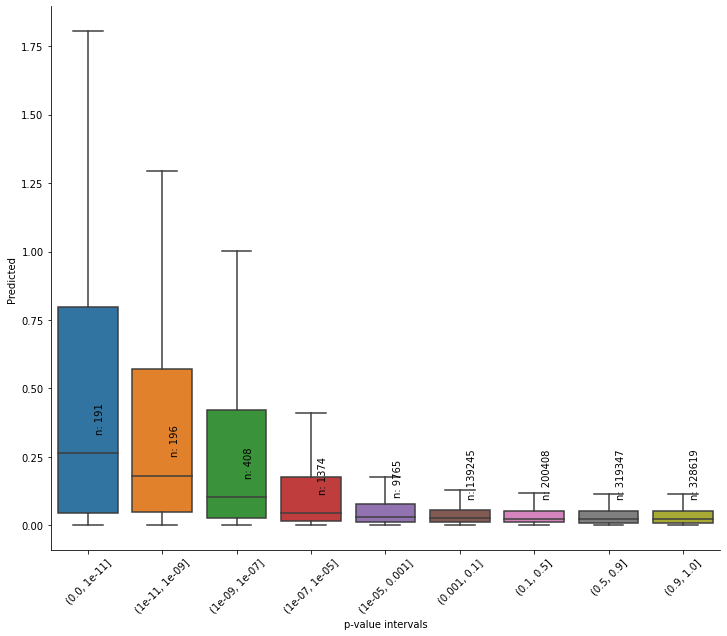

In [115]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls_atac['pc_comp'] = abs(get_pc_component(bqtls_atac))
bqtls_atac['value_group'] = pd.cut(bqtls_atac["pvalue"].astype(np.float64), bins=bins)
ax = sns.boxplot(x="value_group", y="pc_comp", data=bqtls_atac, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls_atac.groupby(['value_group'])['pc_comp'].median().values
nobs= bqtls_atac['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

#plt.savefig("subfigs_new/atac_bqtls_with_pval_predicted.pdf", transparent=True, dpi=300)


['n: 191', 'n: 196', 'n: 408', 'n: 1374', 'n: 9765', 'n: 139245', 'n: 200408', 'n: 319347', 'n: 328619']


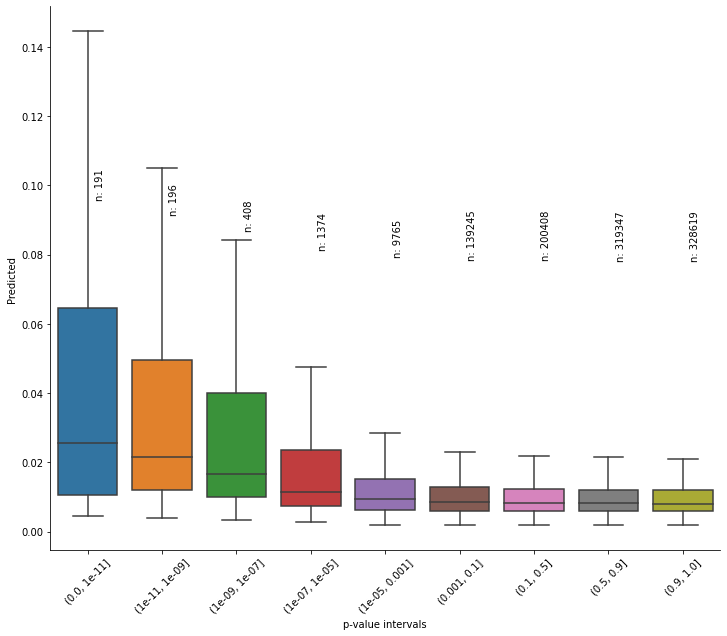

In [111]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls_atac['value_group'] = pd.cut(bqtls_atac["pvalue"].astype(np.float64), bins=bins)
ax = sns.boxplot(x="value_group", y="jsd.mean", data=bqtls_atac, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls_atac.groupby(['value_group'])['jsd.mean'].median().values
nobs= bqtls_atac['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs_new/atac_bqtls_with_pval_predicted.pdf", transparent=True, dpi=300)


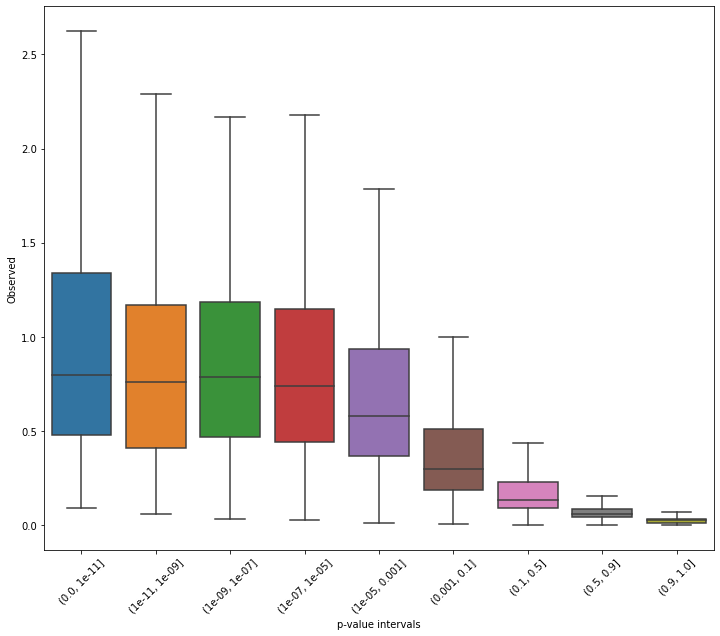

In [110]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls_atac['value_group'] = pd.cut(bqtls_atac["pvalue"].astype(np.float64), bins=bins)
bqtls_atac['abs_logratio'] = np.abs(bqtls_atac['logratio'])
ax = sns.boxplot(x="value_group", y="abs_logratio", data=bqtls_atac, showfliers=False)
plt.xticks(rotation=45)
ax.set(xlabel='p-value intervals', ylabel='Observed')

plt.savefig("subfigs_new/bqtls_with_pval_observed.pdf", transparent=True, dpi=300)
